# Machine Learning with Python

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 2.2 Regression

In this notebook we will discuss some examples of supervised learning algorithms applied to regression. 


c.f. classification where we predict a class label. regression is when you are trying to predict a number/numbers

### Example data

We will use the *diabetes* dataset as an example:


In [2]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=42)

### Linear Model

Linear regression uses Ordinary Least Squares to find the optimal model.


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Use only one feature
X_train_1 = X_train[:, np.newaxis, 2]
X_test_1 = X_test[:, np.newaxis, 2]

lm_1 = LinearRegression()
lm_1.fit(X_train_1, y_train)

LinearRegression()

Coefficients: 
 [975.27698313]


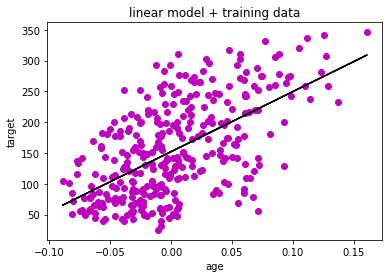

In [5]:
y_pred = lm_1.predict(X_train_1)

print("Coefficients: \n", lm_1.coef_)

plt.scatter(X_train_1, y_train, c='m' )
plt.plot(X_train_1, y_pred, c="k")
plt.title("linear model + training data")
plt.xlabel(diabetes.feature_names[0])
plt.ylabel("target")
plt.show()

We evaluate on the test data:

Mean squared error, MSE = 3775.62
Coefficient of determination, r2 = 0.32


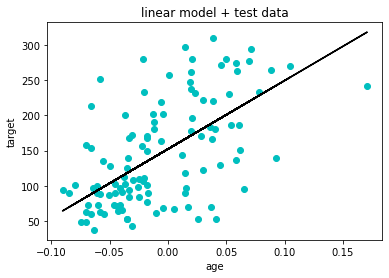

In [6]:
y_pred = lm_1.predict(X_test_1)

# The mean squared error
print("Mean squared error, MSE = %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination, r2 = %.2f" % r2_score(y_test, y_pred))

plt.scatter(X_test_1, y_test, c='c')
plt.plot(X_test_1, y_pred, c='k')
plt.title("linear model + test data")
plt.xlabel(diabetes.feature_names[0])
plt.ylabel("target")
plt.show()

We can improve the model performance by including all the features: 

In [7]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [8]:
print("Coefficients: \n", lm.coef_)

Coefficients: 
 [  47.74657117 -241.99180361  531.96856896  381.56529922 -918.49020552
  508.25147385  116.94040498  269.48508571  695.8062205    26.32343144]


In [9]:
y_pred = lm.predict(X_test)

# The mean squared error
print("Mean squared error, MSE = %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination, r2 = %.2f" % r2_score(y_test, y_pred))


Mean squared error, MSE = 2848.30
Coefficient of determination, r2 = 0.48


### Regularisation

OLS places no restrictions on the values of the coefficients. 

However, to avoid overfitting we may prefer to find a model that still fits the training data well, but has coefficients that are (mostly) small. This idea is called *regularisation*.


In [*ridge regression*](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification), we add an additional L2 penalty on top of the squared error.

In [10]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [11]:
print("Coefficients: \n", ridge.coef_)

Coefficients: 
 [  52.86442082 -200.5093509   493.95700648  339.28347558 -118.06187776
  -80.91224747 -215.28246821  153.41367163  365.68207213   62.42194618]


In [12]:
y_pred = ridge.predict(X_test)

# The mean squared error
print("Mean squared error, MSE = %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination, r2 = %.2f" % r2_score(y_test, y_pred))



Mean squared error, MSE = 2810.03
Coefficient of determination, r2 = 0.49


In [*LASSO regression*](https://scikit-learn.org/stable/modules/linear_model.html#lasso), we use an L1 penalty instead. This tends to produce coefficients that are exactly 0, hence they can be removed from the model. LASSO can therefore be used as an automated form of feature selection.

In [13]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.5)
lasso.fit(X_train,y_train)

Lasso(alpha=0.5)

In [14]:
print("Coefficients: \n", lasso.coef_)

Coefficients: 
 [   0.           -0.          492.28522027  187.79307581   -0.
   -0.         -107.63391392    0.          322.2269439     0.        ]


In [15]:
y_pred = lasso.predict(X_test)

# The mean squared error
print("Mean squared error, MSE = %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination, r2 = %.2f" % r2_score(y_test, y_pred))


Mean squared error, MSE = 2894.68
Coefficient of determination, r2 = 0.48


### Nonlinear regression

Note that many supervised learning algorithms can be used for both classification and regression with only minor adaptations:

### k-Nearest Neighbours

In [16]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [17]:
y_pred = knn.predict(X_test)

# The mean squared error
print("Mean squared error, MSE = %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination, r2 = %.2f" % r2_score(y_test, y_pred))


Mean squared error, MSE = 3060.17
Coefficient of determination, r2 = 0.45


### Decision tree

In [18]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [19]:
y_pred = tree.predict(X_test)

# The mean squared error
print("Mean squared error, MSE = %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination, r2 = %.2f" % r2_score(y_test, y_pred))


Mean squared error, MSE = 5358.33
Coefficient of determination, r2 = 0.03


### Random forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,random_state=0)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [21]:
y_pred = rf.predict(X_test)

# The mean squared error
print("Mean squared error, MSE = %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination, r2 = %.2f" % r2_score(y_test, y_pred))



Mean squared error, MSE = 2908.84
Coefficient of determination, r2 = 0.47


### Neural network

In [22]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=(100),max_iter=10000)
nn.fit(X_train,y_train)

MLPRegressor(hidden_layer_sizes=100, max_iter=10000)

In [23]:
y_pred = nn.predict(X_test)

# The mean squared error
print("Mean squared error, MSE = %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination, r2 = %.2f" % r2_score(y_test, y_pred))



Mean squared error, MSE = 2836.86
Coefficient of determination, r2 = 0.49


### Support Vector Machine

In [24]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [25]:
y_pred = svr.predict(X_test)

# The mean squared error
print("Mean squared error, MSE = %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination, r2 = %.2f" % r2_score(y_test, y_pred))



Mean squared error, MSE = 5417.36
Coefficient of determination, r2 = 0.02


Performance here is unexpectedly bad - this is no better than using the mean target value for all predictions.

The explanation is that SVM is extremely sensitive to unstandardised data!

In [26]:
np.mean(X_train,axis=0)

array([ 1.01523468e-03,  2.83420346e-04,  2.32536802e-03,  1.29487507e-03,
        5.59402305e-04,  4.79872588e-05, -5.94854447e-04,  8.62619379e-04,
        1.73778107e-03,  3.25211819e-03])

In [27]:
np.std(X_train,axis=0)

array([0.04638937, 0.04758229, 0.04713972, 0.04782783, 0.04806152,
       0.04823114, 0.047008  , 0.04826392, 0.04797272, 0.04740712])

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
np.mean(X_train_scaled,axis=0)

array([-5.50080290e-17,  2.07957183e-17,  2.07957183e-17, -4.00820699e-17,
       -2.44852812e-17, -6.70829622e-19,  1.94540590e-17,  2.71685997e-17,
       -7.49652103e-17,  1.67749332e-16])

In [30]:
np.std(X_train_scaled,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [31]:
svr2 = SVR(kernel='linear')
svr2.fit(X_train_scaled,y_train)

SVR(kernel='linear')

In [32]:
y_pred = svr2.predict(X_test_scaled)

# The mean squared error
print("Mean squared error, MSE = %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination, r2 = %.2f" % r2_score(y_test, y_pred))


Mean squared error, MSE = 2859.13
Coefficient of determination, r2 = 0.48


## Exercise

Train a regressor of your choice on the `wine_quality_white` dataset.

In [33]:
from sklearn.datasets import fetch_openml
w = fetch_openml(name='wine-quality-white',version=1)

Evaluate your model on the test data.

Does your model do better than Ordinary Least Squares?